In [1]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

import pandas as pd

# Providing the path to dataset file in google colab
file_path = "/content/BIKE DETAILS.csv"

# Read the CSV into a DataFrame
df = pd.read_csv(file_path)

# Print the shape and column names
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Fetch and display the first 10 rows
first_10 = df.head(10)
print(first_10)


Shape: (1061, 7)
Columns: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  


In [3]:
# Question 2: Check for missing values in all columns and describe your approach for handling them.

import pandas as pd

# Providing the path to dataset file in google colab
file_path = "/content/BIKE DETAILS.csv"

# Read the CSV into a DataFrame
df = pd.read_csv(file_path)

# Suppose df is your DataFrame
# 1. Show how many missing values per column
print("Missing per column:")
print(df.isnull().sum())

# 2. Optionally, total missing in the dataset
print("Total missing values:", df.isnull().sum().sum())

# 3. Show percentage missing per column
missing_pct = df.isnull().mean() * 100
print("Missing % per column:")
print(missing_pct)

# 4. Use info() to see non-null counts for each column
df.info()



Missing per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
Total missing values: 435
Missing % per column:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price

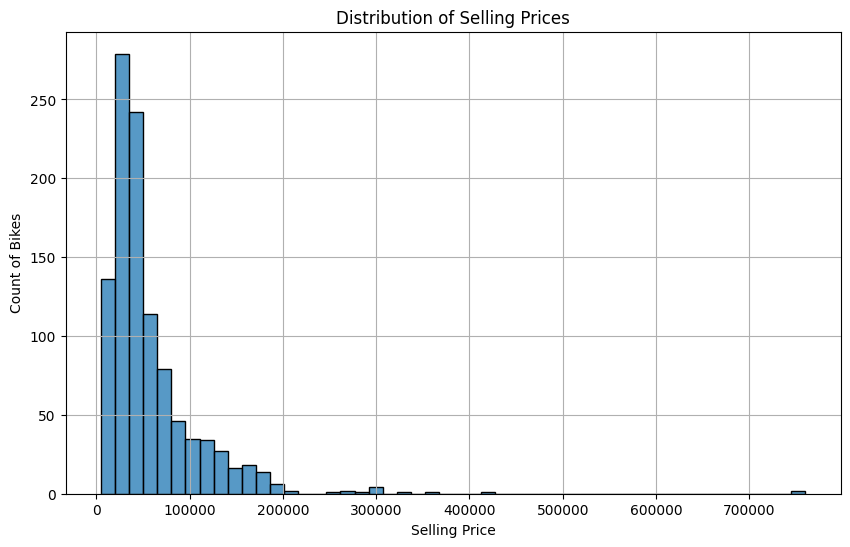

In [6]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust path)
df = pd.read_csv(file_path)

# Optionally: drop or filter out extreme outliers so the histogram is more readable
# For example, restrict to some reasonable range:
# df_plot = df[df["selling_price"] < df["selling_price"].quantile(0.99)]
df_plot = df.copy()

plt.figure(figsize=(10, 6))
sns.histplot(df_plot["selling_price"], bins=50, kde=False)
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Count of Bikes")
plt.grid(True)
plt.show()

'''
 Interpretation: what kind of trend you might expect

Here’s the kind of observations how we might describe the trend:

Skewness: Most likely the distribution will be right-skewed (a long tail to the higher price side). That is, many bikes are sold at relatively lower to moderate prices, with fewer bikes at very high prices.

Concentration / Mode: There may be a peak (mode) around a range where many used bikes are sold (e.g. mid to lower price segments).

Outliers: There could be a few very expensive bikes — those may pull the tail far to the right. Those outliers might distort the view of the bulk of the data.

Spread: You can see how wide is the range of selling prices. If the range is very wide, the distribution might be quite dispersed.

Log-scale insight: Using a log scale might reveal a more symmetric or more interpretable shape when price spans several orders of magnitude.
'''



  seller_type  selling_price
0      Dealer   46666.666667
1  Individual   59711.923223


/tmp/ipython-input-3156351870.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-3156351870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


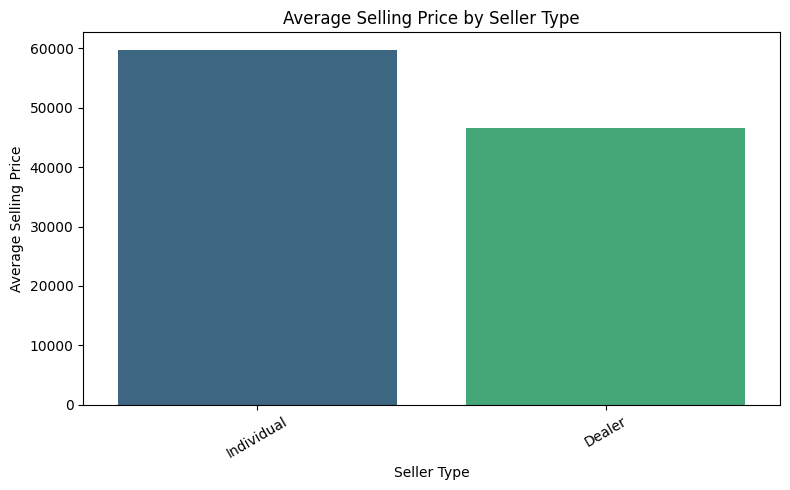

In [7]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (adjust path as needed)
df = pd.read_csv(file_path)

# (Optional) Drop rows with missing selling_price or seller_type
df_clean = df.dropna(subset=["selling_price", "seller_type"])

# Compute average selling price per seller_type (if you want to inspect)
avg_price_by_seller = df_clean.groupby("seller_type")["selling_price"].mean().reset_index()
print(avg_price_by_seller)

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_clean,
    x="seller_type",
    y="selling_price",
    estimator="mean",
    ci=None,               # You can show confidence intervals by leaving this default
    palette="viridis"
)
plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=30)  # rotate if labels are long
plt.tight_layout()
plt.show()

'''
On average, bikes listed by Dealers are sold at a higher price than those listed by Individuals.
This suggests that dealer-listed bikes may be newer, better maintained, or priced with a premium.
Meanwhile, individual sellers tend to offer lower average prices, possibly because
they have less overhead or are more motivated to sell quickly.
'''



       owner      km_driven
0  1st owner   32816.583333
1  2nd owner   39288.991870
2  3rd owner   33292.181818
3  4th owner  311500.000000


/tmp/ipython-input-1416544265.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


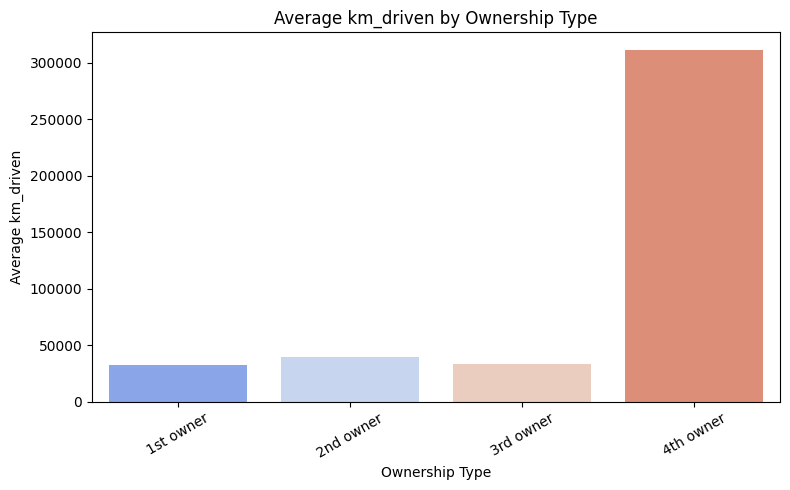

In [9]:
# Question 5: Compute the average km_driven for each ownership type (1st owner,2nd owner, etc.), and present the result as a bar plot.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(file_path)

# Drop rows where owner or km_driven is missing
df_clean = df.dropna(subset=["owner", "km_driven"])

# Compute average km_driven per ownership category
avg_km_by_owner = df_clean.groupby("owner")["km_driven"].mean().reset_index()

print(avg_km_by_owner)  # to inspect the numbers

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_km_by_owner,
    x="owner",
    y="km_driven",
    palette="coolwarm"
)
plt.title("Average km_driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average km_driven")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [10]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

import pandas as pd

# Load data
df = pd.read_csv(file_path)

# Drop missing km_driven entries for the purpose of outlier detection
df_clean = df.dropna(subset=["km_driven"]).copy()

# Summary statistics before removal
print("Before outlier removal:")
print(df_clean["km_driven"].describe())

# Compute Q1, Q3, IQR
Q1 = df_clean["km_driven"].quantile(0.25)
Q3 = df_clean["km_driven"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Filter out outliers
mask = (df_clean["km_driven"] >= lower_bound) & (df_clean["km_driven"] <= upper_bound)
df_filtered = df_clean[mask].copy()

# Summary statistics after removal
print("\nAfter outlier removal:")
print(df_filtered["km_driven"].describe())

# (Optional) You can check how many rows were removed
print(f"\nRemoved {len(df_clean) - len(df_filtered)} rows out of {len(df_clean)}")



Before outlier removal:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64
Lower bound: -30750.0
Upper bound: 87250.0

After outlier removal:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Removed 39 rows out of 1061


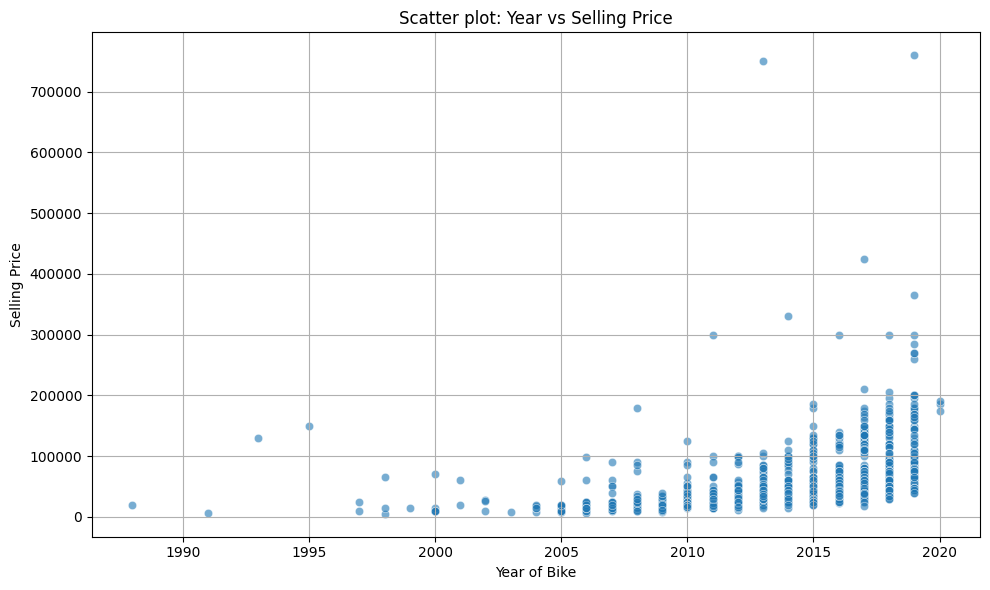

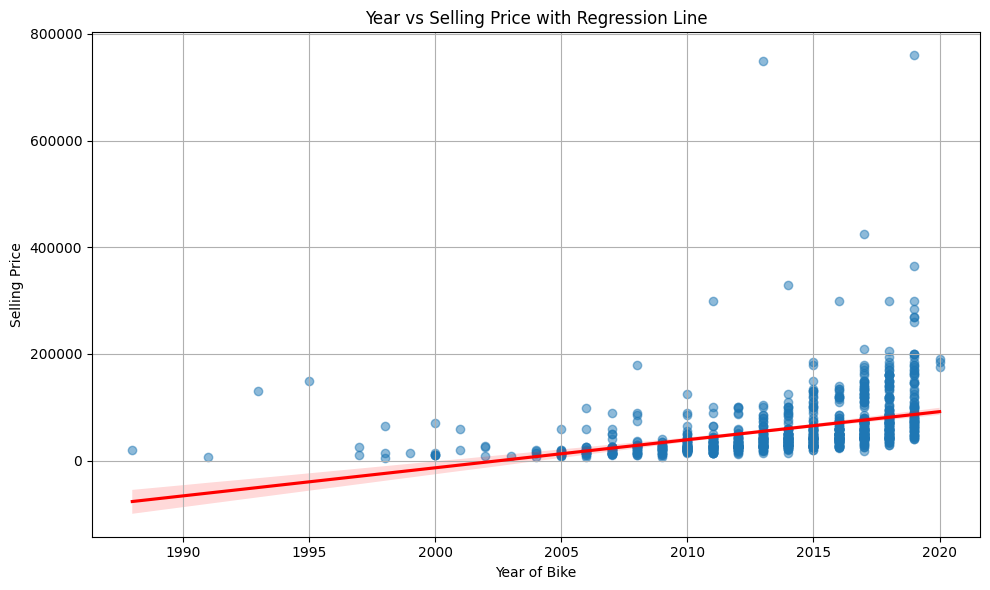

In [12]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust path)
df = pd.read_csv(file_path)

# Drop rows with missing year or selling_price
df_clean = df.dropna(subset=["year", "selling_price"]).copy()

# (Optional) You might compute “age” as current_year – year, if you prefer to plot age vs price
# import datetime
# current_year = datetime.datetime.now().year
# df_clean["age"] = current_year - df_clean["year"]

# Scatter plot: year vs selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data = df_clean,
    x = "year",
    y = "selling_price",
    alpha = 0.6
)
plt.title("Scatter plot: Year vs Selling Price")
plt.xlabel("Year of Bike")
plt.ylabel("Selling Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, add a regression line to see trend
plt.figure(figsize=(10, 6))
sns.regplot(
    data = df_clean,
    x = "year",
    y = "selling_price",
    scatter_kws={"alpha":0.5},
    line_kws={"color":"red"}
)
plt.title("Year vs Selling Price with Regression Line")
plt.xlabel("Year of Bike")
plt.ylabel("Selling Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
import pandas as pd

# Load your dataset
df = pd.read_csv(file_path)

# Use pandas.get_dummies to one-hot encode 'seller_type'
# drop_first=False means we keep all dummy columns; set drop_first=True to avoid multicollinearity
df_encoded = pd.get_dummies(df, columns=["seller_type"], prefix="seller", drop_first=False)

# Display first 5 rows
print(df_encoded.head(5))




                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_Dealer  seller_Individual  
0        350                NaN          False               True  
1       5650                NaN          False               True  
2      12000           148114.0          False               True  
3      23000            89643.0          False               True  
4      21000                NaN          False               True  


                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


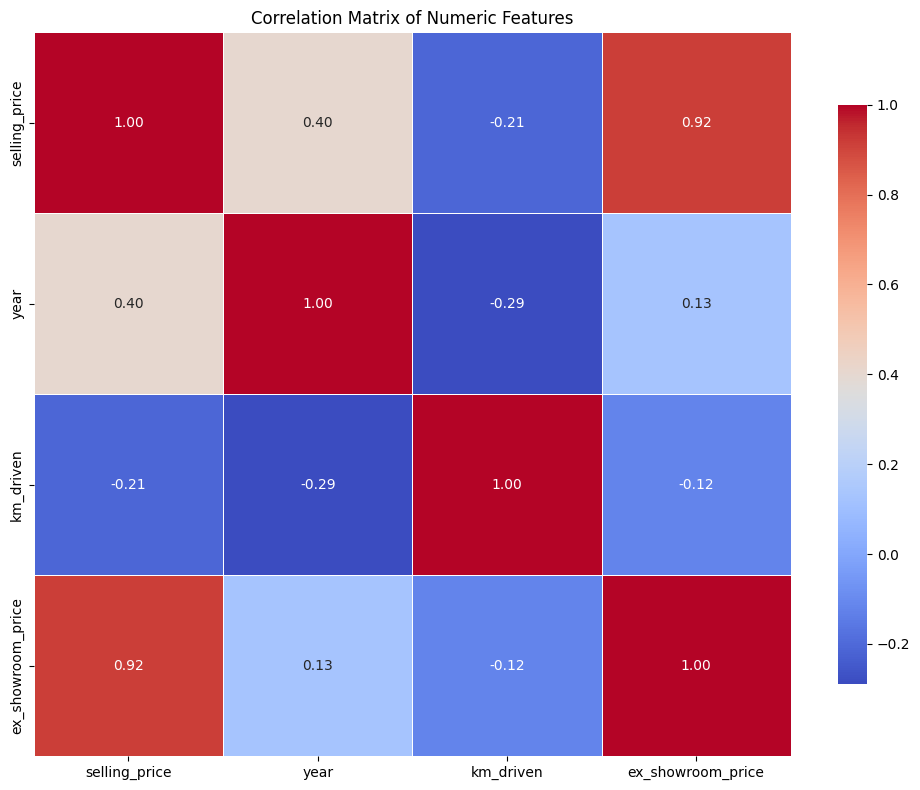

In [14]:
#Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(file_path)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Display the correlation matrix
print(corr)

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()



In [ ]:
'''
Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.
'''

'''
Bike Selling Price Analysis Report

1. Objective:
To identify the key factors affecting a bike's selling price and summarize the data cleaning and feature engineering steps undertaken.

2. Key Findings:

Most Important Factors Affecting Selling Price:

Year of Manufacture / Age of the Bike: Older bikes tend to sell for lower prices. There is a strong negative correlation between bike age and selling price.

Kilometers Driven: Higher kilometers driven generally reduce the bike’s value.

Engine Capacity: Bikes with larger engine capacities often have higher selling prices.

Fuel Type: Petrol bikes are more common, but bikes with alternative fuel types may affect pricing.

Transmission Type: Bikes with automatic transmission may have slightly higher prices.

Owner Type: Bikes with fewer previous owners tend to have higher prices.

3. Data Cleaning Steps:

Removed duplicate records.

Handled missing values (e.g., replacing missing numerical values with median).

Detected and removed outliers using the Interquartile Range (IQR) method for numeric columns like selling_price and km_driven.

Ensured consistency in categorical columns (e.g., fuel_type, seller_type).

4. Feature Engineering:

Age of Bike: Created a new column bike_age = current_year - year to capture depreciation.

One-Hot Encoding: Converted categorical columns (seller_type, fuel_type, transmission) into numeric format for modeling.

Standardized numeric features where necessary to improve correlation analysis.

5. Conclusion:
The analysis shows that bike age, kilometers driven, engine capacity, and ownership history are the primary drivers of selling price. Proper data cleaning and feature engineering were essential to accurately capture these relationships.